<a href="https://colab.research.google.com/github/glazar01/lyric-pulse-sentiment-analysis/blob/main/data_and_model_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data & Models Exploration

In this markdown we have a first look at our dataset and try testing our selected models on some inputs

In [1]:
!pip install --no-cache-dir transformers sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 353.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 134.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 413.0 MB/s eta 0:00:00


In [2]:
# import libraries
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import spacy

# Data

## Single Label Data

In [3]:
url = "https://raw.githubusercontent.com/glazar01/lyric-pulse-sentiment-analysis/main/data/SingleLabel.csv"
s_data = pd.read_csv(url)

In [4]:
s_data.head()

,artist,genre,title,album,year,lyrics,label
0,Nirvana,Rock,You Know You’re Right,Nirvana,2002.0,I will never bother you\nI will never promise ...,Sadness
1,Damian Marley,Reggae,Here We Go,Stony Hill,2017.0,Here we go\nMy big ego is gonna get me in trou...,Tension
2,The Mission UK,Rock,Jade,Another Fall from Grace,2016.0,She came as Lolita dressed as Venus\nAnd adorn...,Tenderness
3,UB40,Reggae,Food For Thought,Signing Off,1980.0,"Ivory Madonna, dying in the dust\nWaiting for ...",Sadness
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,1996.0,I was totin' my pack along the dusty Winnemucc...,Sadness


In [5]:
labels = s_data['label']
unique_labels = labels.unique()
unique_labels

array(['Sadness', 'Tension', 'Tenderness'], dtype=object)

In [6]:
s_lyrics = s_data['lyrics']
print(s_lyrics.head())
s_lyrics.shape

0    I will never bother you\nI will never promise ...
1    Here we go\nMy big ego is gonna get me in trou...
2    She came as Lolita dressed as Venus\nAnd adorn...
3    Ivory Madonna, dying in the dust\nWaiting for ...
4    I was totin' my pack along the dusty Winnemucc...
Name: lyrics, dtype: object


(1160,)

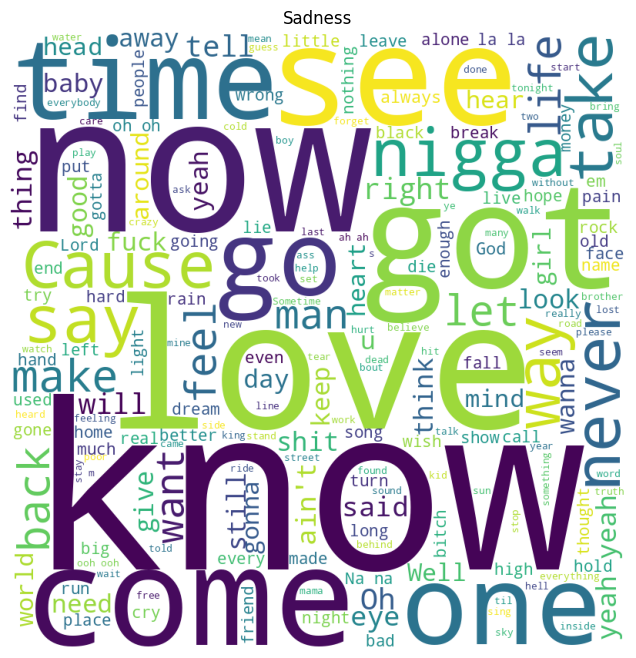

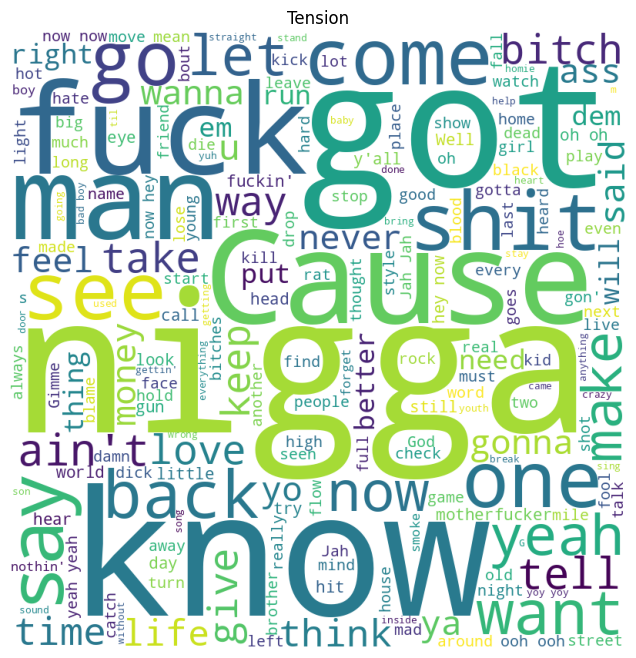

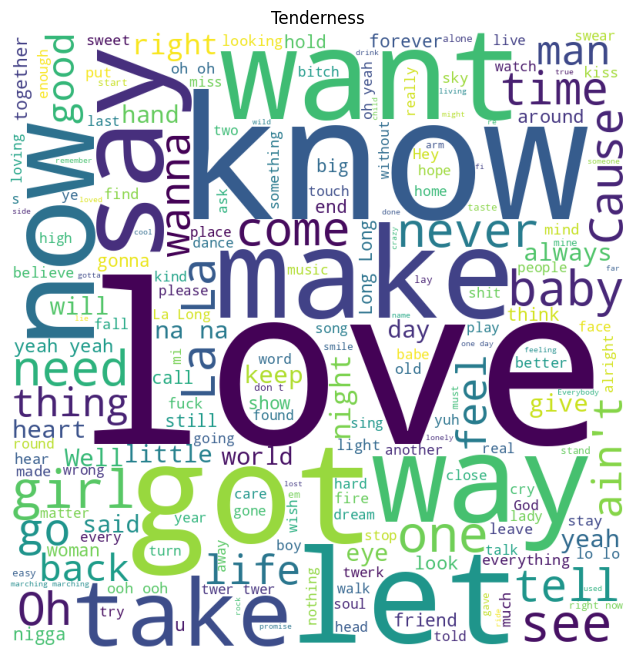

In [7]:
word_dict = dict()
for val in unique_labels:
    sentences = ""
    for l in s_data.loc[s_data['label'] == val]['lyrics']:
        sentences += " " + l
    word_dict[val] =sentences
for key in word_dict:
    word_cloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = STOPWORDS,
                    min_font_size = 5).generate(word_dict[key])
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.axis("off")
    plt.title(str(key))
    plt.imshow(word_cloud)
    plt.savefig(str(key) + ".png")

In [8]:
nlp = spacy.load("en_core_web_sm")
s_lyrics_dict = {}
for i in range(len(s_lyrics)):
  doc = nlp(s_lyrics[i])
  text_segments = [sent.text for sent in doc.sents]
  s_lyrics_dict[i] = text_segments

In [9]:
s_lyrics_dict[0]

["I will never bother you\nI will never promise to\nI will never follow you\nI will never bother you\nNever speak a word again\nI will crawl away for good\nI will move away from here\nYou won't be afraid of fear\n",
 "No thought was put into this\nAnd always knew it would come to this\nThings have never been so swell\nI have never failed to fail\n\nHe-eee-eee-eeey\nHe-eee-eee-eey\nHe-eee-eee-ey\nYou know you're right\n",
 "You know you're right\n",
 "You know you're right\n\nI'm so warm and calm inside\nI no longer have to hide\nLet's talk about someone else\nSteaming soup against her mouth\nNothing really bothers her\nShe just wants to love himself\nI will move away from here\n",
 "You won't be afraid of fear\n",
 "No thought was put into this\nAlways knew it'd come to this\nThings have never been so swell\nI have never failed to fail\n\nHe-eee-eee-eey\nHe-eee-eee-eey\nHe-eee-eee-eey\nHe-eee-eee-eey\nHe-eee-eee-eey\nYou know you're right\n",
 "You know you're right\n",
 "You know you'

## Multi Label Data

In [10]:
url = "https://raw.githubusercontent.com/glazar01/lyric-pulse-sentiment-analysis/main/data/MultiLabel.csv"
m_data = pd.read_csv(url)

In [11]:
m_data.head()

,artist,genre,title,album,year,lyrics,labels
0,Nirvana,Rock,You Know You’re Right,Nirvana,2002.0,I will never bother you\nI will never promise ...,"Calmness, Sadness"
1,Damian Marley,Reggae,Here We Go,Stony Hill,2017.0,Here we go\nMy big ego is gonna get me in trou...,"Power, Tension"
2,The Mission UK,Rock,Jade,Another Fall from Grace,2016.0,She came as Lolita dressed as Venus\nAnd adorn...,"Amazement, Calmness, Solemnity, Tenderness"
3,UB40,Reggae,Food For Thought,Signing Off,1980.0,"Ivory Madonna, dying in the dust\nWaiting for ...","Joyful activation, Sadness, Tension"
4,Johnny Cash,Country,I’ve Been Everywhere,American II: Unchained,1996.0,I was totin' my pack along the dusty Winnemucc...,"Amazement, Calmness, Joyful activation"


In [12]:
y = m_data['labels']

In [13]:
y

0                                Calmness, Sadness
1                                   Power, Tension
2       Amazement, Calmness, Solemnity, Tenderness
3              Joyful activation, Sadness, Tension
4           Amazement, Calmness, Joyful activation
                           ...                    
1155                Nostalgia, Sadness, Tenderness
1156                   Calmness, Power, Tenderness
1157                     Power, Solemnity, Tension
1158                                    Tenderness
1159         Amazement, Calmness, Nostalgia, Power
Name: labels, Length: 1160, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Custom tokenizer that doesn't split on spaces
def custom_tokenizer(text):
    return text.split(', ')

vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
emotion_dtm = vectorizer.fit_transform(y)
emotions = vectorizer.get_feature_names_out()
emotions

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['amazement', 'calmness', 'joyful activation', 'nostalgia', 'power',
       'sadness', 'solemnity', 'tenderness', 'tension'], dtype=object)

In [19]:
freqs = emotion_dtm.sum(axis=0).A1
result = dict(zip(emotions, freqs))
freq_count = pd.DataFrame(result.items(), columns=['Emotions', 'Counts'])
freq_sorted = freq_count.sort_values(['Counts'], ascending=False)
freq_sorted

,Emotions,Counts
5,sadness,574
8,tension,553
7,tenderness,498
4,power,477
3,nostalgia,438
6,solemnity,377
2,joyful activation,349
1,calmness,250
0,amazement,239


In [20]:
emotion_per_example = emotion_dtm.sum(axis=1).tolist()
emotion_per_example = [int(j) for i in emotion_per_example for j in i]
print('Maximum emotions per example: %d'%max(emotion_per_example))
print('Minimum emotions per example: %d'%min(emotion_per_example))
print('Average emotions per example: %f'% ((sum(emotion_per_example))/len(emotion_per_example)))

Maximum emotions per example: 7
Minimum emotions per example: 1
Average emotions per example: 3.237069


# MODELS

In this part, we just introduce the models with an example

# 1. roberta-base-go_emotions

go_emotions is based on Reddit data and has 28 labels. It is a multi-label dataset where one or multiple labels may apply for any given input text, hence this model is a multi-label classification model with 28 'probability' float outputs for any given input text. Typically a threshold of 0.5 is applied to the probabilities for the prediction for each label.

### Example

In [21]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

In [22]:
sentences = ["I am not having a great day"]

model_outputs = classifier(sentences)
print(model_outputs[0])
# produces a list of dicts for each of the labels

[{'label': 'disappointment', 'score': 0.4666948914527893}, {'label': 'sadness', 'score': 0.3984951376914978}, {'label': 'annoyance', 'score': 0.06806588917970657}, {'label': 'neutral', 'score': 0.05703027546405792}, {'label': 'disapproval', 'score': 0.044239237904548645}, {'label': 'nervousness', 'score': 0.014850731007754803}, {'label': 'realization', 'score': 0.014059892855584621}, {'label': 'approval', 'score': 0.011267454363405704}, {'label': 'joy', 'score': 0.006303390488028526}, {'label': 'remorse', 'score': 0.006221487186849117}, {'label': 'caring', 'score': 0.006029406096786261}, {'label': 'embarrassment', 'score': 0.005265481304377317}, {'label': 'anger', 'score': 0.0049814279191195965}, {'label': 'disgust', 'score': 0.004259033594280481}, {'label': 'grief', 'score': 0.004002138506621122}, {'label': 'confusion', 'score': 0.003382911439985037}, {'label': 'relief', 'score': 0.003140498884022236}, {'label': 'desire', 'score': 0.0028274687938392162}, {'label': 'admiration', 'score

### Testing model

In [23]:
emotion_labels_2 = []

#length = s_lyrics.shape[0]
length = 5

for i in range(length):
  try:
    emotion_labels_2.append(classifier(s_lyrics[i]))
  except Exception as e:
    print("i =", i,": An exception occurred")
    print(e)

Token indices sequence length is longer than the specified maximum sequence length for this model (969 > 512). Running this sequence through the model will result in indexing errors


i = 1 : An exception occurred
The expanded size of the tensor (969) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 969].  Tensor sizes: [1, 514]
i = 4 : An exception occurred
The expanded size of the tensor (684) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 684].  Tensor sizes: [1, 514]


In [24]:
print(len(emotion_labels_2))
print(emotion_labels_2)
print(emotion_labels_2[0])

3
[[[{'label': 'approval', 'score': 0.5469816327095032}, {'label': 'neutral', 'score': 0.3794184625148773}, {'label': 'realization', 'score': 0.04105563089251518}, {'label': 'annoyance', 'score': 0.03877561539411545}, {'label': 'anger', 'score': 0.01128037553280592}, {'label': 'disapproval', 'score': 0.009933975525200367}, {'label': 'admiration', 'score': 0.009317505173385143}, {'label': 'caring', 'score': 0.008861231617629528}, {'label': 'optimism', 'score': 0.008721115067601204}, {'label': 'love', 'score': 0.008435338735580444}, {'label': 'fear', 'score': 0.007663615047931671}, {'label': 'excitement', 'score': 0.007383403833955526}, {'label': 'joy', 'score': 0.006509266793727875}, {'label': 'disappointment', 'score': 0.005609430372714996}, {'label': 'sadness', 'score': 0.0035840861964970827}, {'label': 'relief', 'score': 0.0033677390310913324}, {'label': 'surprise', 'score': 0.003108671633526683}, {'label': 'pride', 'score': 0.0027468788903206587}, {'label': 'disgust', 'score': 0.002

# 2. emotion-english-distilroberta-base

With this model, you can classify emotions in English text data. The model was trained on 6 diverse datasets (see Appendix below) and predicts Ekman's 6 basic emotions, plus a neutral class:

anger 🤬
disgust 🤢
fear 😨
joy 😀
neutral 😐
sadness 😭
surprise 😲

The model is a fine-tuned checkpoint of DistilRoBERTa-base. For a 'non-distilled' emotion model, please refer to the model card of the RoBERTa-large version.

### Example

In [25]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [26]:
classifier("I love this!")

[[{'label': 'anger', 'score': 0.004419783595949411},
  {'label': 'disgust', 'score': 0.0016119909705594182},
  {'label': 'fear', 'score': 0.0004138524236623198},
  {'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'neutral', 'score': 0.005764586851000786},
  {'label': 'sadness', 'score': 0.002092392183840275},
  {'label': 'surprise', 'score': 0.008528684265911579}]]

### Testing model

In [27]:
emotion_labels_3 = []

#length = s_lyrics.shape[0]
length = 5

for i in range(length):
  try:
    emotion_labels_3.append(classifier(s_lyrics[i]))
  except Exception as e:
    print("i =", i,": An exception occurred")
    print(e)

Token indices sequence length is longer than the specified maximum sequence length for this model (969 > 512). Running this sequence through the model will result in indexing errors


i = 1 : An exception occurred
The expanded size of the tensor (969) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 969].  Tensor sizes: [1, 514]
i = 4 : An exception occurred
The expanded size of the tensor (684) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 684].  Tensor sizes: [1, 514]


In [28]:
print(len(emotion_labels_3))
print(emotion_labels_3)
emotion_labels_3[0]

3
[[[{'label': 'anger', 'score': 0.012856223620474339}, {'label': 'disgust', 'score': 0.0023253539111465216}, {'label': 'fear', 'score': 0.919241189956665}, {'label': 'joy', 'score': 0.01224049273878336}, {'label': 'neutral', 'score': 0.04051033779978752}, {'label': 'sadness', 'score': 0.01037988904863596}, {'label': 'surprise', 'score': 0.0024464598391205072}]], [[{'label': 'anger', 'score': 0.05303313583135605}, {'label': 'disgust', 'score': 0.04384787753224373}, {'label': 'fear', 'score': 0.014357347041368484}, {'label': 'joy', 'score': 0.004614776931703091}, {'label': 'neutral', 'score': 0.1659114807844162}, {'label': 'sadness', 'score': 0.7068246006965637}, {'label': 'surprise', 'score': 0.01141077559441328}]], [[{'label': 'anger', 'score': 0.048264507204294205}, {'label': 'disgust', 'score': 0.08646200597286224}, {'label': 'fear', 'score': 0.4018775522708893}, {'label': 'joy', 'score': 0.006977416109293699}, {'label': 'neutral', 'score': 0.0667814388871193}, {'label': 'sadness', 

[[{'label': 'anger', 'score': 0.012856223620474339},
  {'label': 'disgust', 'score': 0.0023253539111465216},
  {'label': 'fear', 'score': 0.919241189956665},
  {'label': 'joy', 'score': 0.01224049273878336},
  {'label': 'neutral', 'score': 0.04051033779978752},
  {'label': 'sadness', 'score': 0.01037988904863596},
  {'label': 'surprise', 'score': 0.0024464598391205072}]]

# 3. distilbert-base-uncased-emotion

Distilbert is created with knowledge distillation during the pre-training phase which reduces the size of a BERT model by 40%, while retaining 97% of its language understanding. It's smaller, faster than Bert and any other Bert-based model.

Labels: sadness, joy, love, anger, fear and surprise

### Example

In [29]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

In [30]:
prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", )
prediction

[[{'label': 'sadness', 'score': 0.000679271062836051},
  {'label': 'joy', 'score': 0.9959298968315125},
  {'label': 'love', 'score': 0.0009452453814446926},
  {'label': 'anger', 'score': 0.001805523643270135},
  {'label': 'fear', 'score': 0.0004111046146135777},
  {'label': 'surprise', 'score': 0.00022885717044118792}]]

### Testing model

In [31]:
emotion_labels_4 = []

#length = s_lyrics.shape[0]
length = 5

for i in range(length):
  try:
    emotion_labels_4.append(classifier(s_lyrics[i]))
  except Exception as e:
    print("i =", i,": An exception occurred")
    print(e)

Token indices sequence length is longer than the specified maximum sequence length for this model (894 > 512). Running this sequence through the model will result in indexing errors


i = 1 : An exception occurred
The size of tensor a (894) must match the size of tensor b (512) at non-singleton dimension 1
i = 4 : An exception occurred
The size of tensor a (625) must match the size of tensor b (512) at non-singleton dimension 1


In [32]:
print(len(emotion_labels_4))
print(emotion_labels_4)
emotion_labels_4[0]

3
[[[{'label': 'sadness', 'score': 0.22644810378551483}, {'label': 'joy', 'score': 0.15882563591003418}, {'label': 'love', 'score': 0.004645639099180698}, {'label': 'anger', 'score': 0.43686217069625854}, {'label': 'fear', 'score': 0.1714329570531845}, {'label': 'surprise', 'score': 0.0017855354817584157}]], [[{'label': 'sadness', 'score': 0.03524401783943176}, {'label': 'joy', 'score': 0.8715861439704895}, {'label': 'love', 'score': 0.008181072771549225}, {'label': 'anger', 'score': 0.07791195064783096}, {'label': 'fear', 'score': 0.00531331542879343}, {'label': 'surprise', 'score': 0.0017635419499129057}]], [[{'label': 'sadness', 'score': 0.816483736038208}, {'label': 'joy', 'score': 0.007834312506020069}, {'label': 'love', 'score': 0.0022423171903938055}, {'label': 'anger', 'score': 0.1018594279885292}, {'label': 'fear', 'score': 0.06946741789579391}, {'label': 'surprise', 'score': 0.0021128328517079353}]]]


[[{'label': 'sadness', 'score': 0.22644810378551483},
  {'label': 'joy', 'score': 0.15882563591003418},
  {'label': 'love', 'score': 0.004645639099180698},
  {'label': 'anger', 'score': 0.43686217069625854},
  {'label': 'fear', 'score': 0.1714329570531845},
  {'label': 'surprise', 'score': 0.0017855354817584157}]]

# 4. t5-base-finetuned-emotion

Google's T5 base fine-tuned on emotion recognition dataset for Emotion Recognition downstream task.

Labels:
sadness 😢
joy 😃
love 🥰
anger 😡
fear 😱
surprise 😯

### Example

In [33]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion",use_fast=False)

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

def get_emotion(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = model.generate(input_ids=input_ids,
               max_length=2)

  dec = [tokenizer.decode(ids) for ids in output]

  label = dec[0][5:]
  return label

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1499: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [34]:
get_emotion("i feel as if i havent blogged in ages are at least truly blogged i am doing an update cute") # Output: 'joy'

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5.py:303: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


'joy'

In [35]:
get_emotion("i have a feeling i kinda lost my best friend") # Output: 'sadness'

'sadness'

### Testing model

In [36]:
emotion_labels_5 = []

#length = s_lyrics.shape[0]
length = 5

for i in range(length):
  try:
    emotion_labels_5.append(get_emotion(s_lyrics[i]))
  except Exception as e:
    print("i =", i,": An exception occurred")
    print(e)

Token indices sequence length is longer than the specified maximum sequence length for this model (1008 > 512). Running this sequence through the model will result in indexing errors


In [37]:
print(len(emotion_labels_5))
print(emotion_labels_5)
emotion_labels_5[0]

5
['joy', 'joy', 'joy', 'joy', 'joy']


'joy'